In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

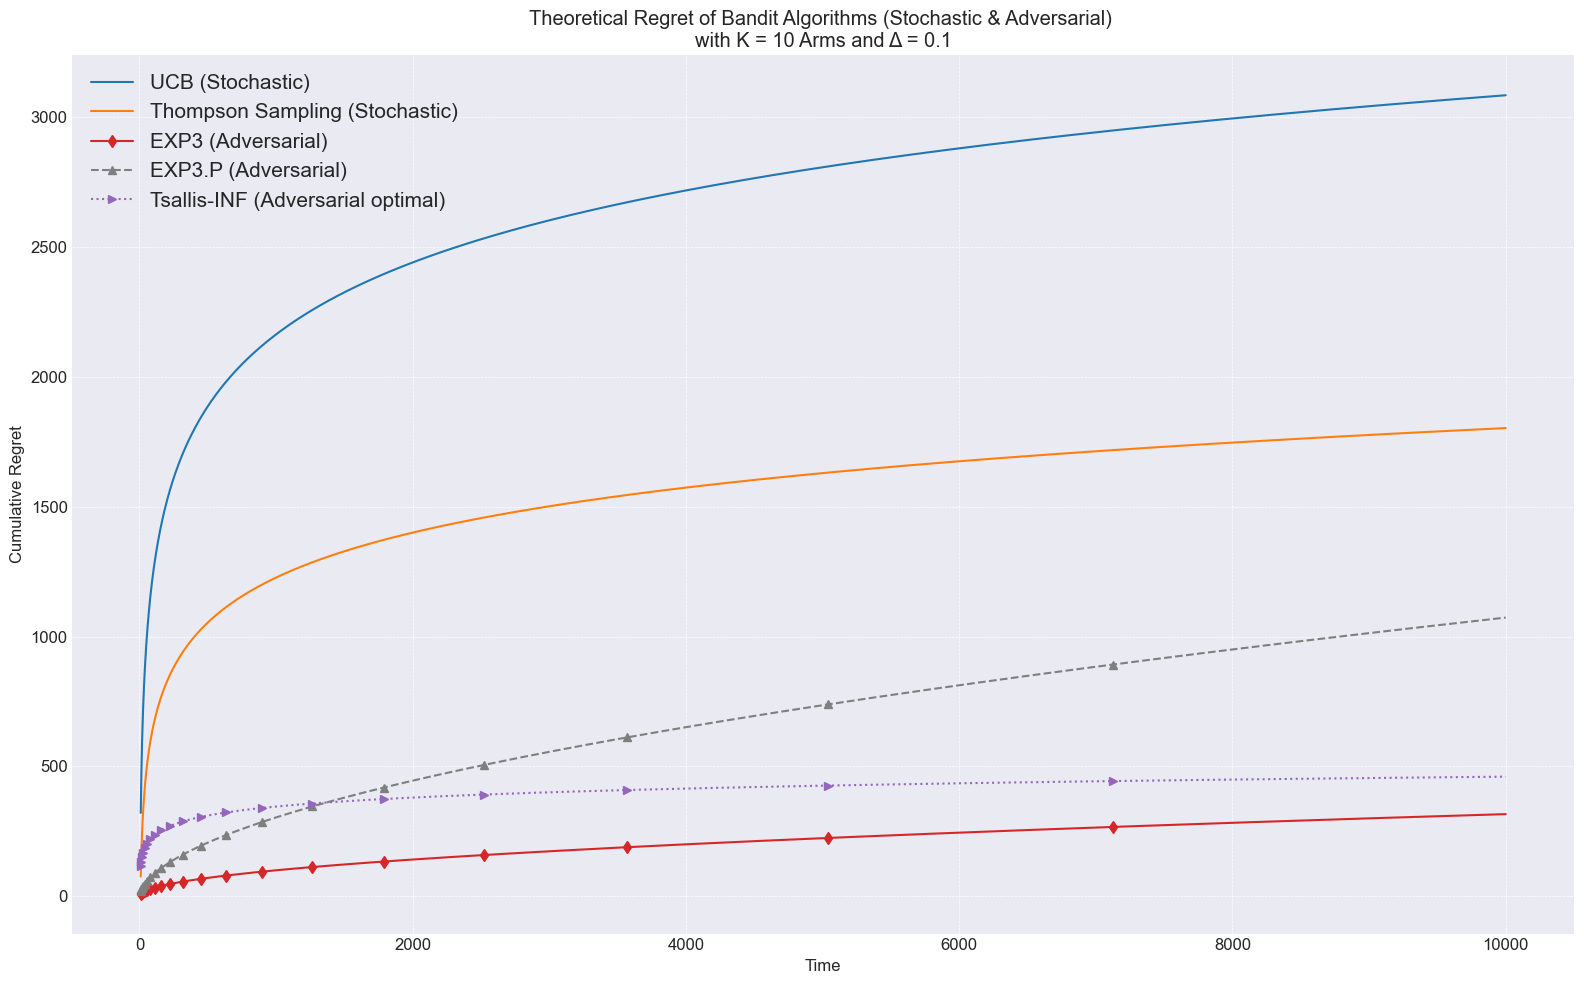

In [39]:
T = np.logspace(1, 4, 1000)  
K = 10 
Delta = 0.2

# Regrets
regrets = {
    "UCB (Stochastic)": 8*K*np.log(T)/Delta - 600,
    "Thompson Sampling (Stochastic)": K*np.log(T)/Delta**2 - 500, #np.sqrt(K * T * np.log(T) / Delta**2),
    "EXP3 (Adversarial)": np.sqrt(K * T),
    "EXP3.P (Adversarial)": np.sqrt(T * K * np.log(T / 0.1)),
    "Tsallis-INF (Adversarial optimal)": K * np.log(T) / Delta
}

# Style
styles = {
    "UCB (Stochastique)": {"color": "#1f77b4", "linestyle": "-", "marker": "x", "markevery": 50},
    "Thompson Sampling (Stochastique)": {"color": "#2ca02c", "linestyle": "-", "marker": "s", "markevery": 50},
    "EXP3 (Adversarial)": {"color": "#d62728", "linestyle": "-", "marker": "d", "markevery": 50},
    "EXP3.P (Adversarial)": {"color": "#7f7f7f", "linestyle": "--", "marker": "^", "markevery": 50},
    "Tsallis-INF (Adversarial optimal)": {"color": "#9467bd", "linestyle": ":", "marker": ">", "markevery": 50}
}

# Plot
fig, ax = plt.subplots()

for algo, regret in regrets.items():
    ax.plot(T, regret, label=algo, **styles.get(algo, {}))
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative Regret")
ax.set_title("Theoretical Regret of Bandit Algorithms (Stochastic & Adversarial) \nwith K = 10 Arms and Δ = 0.1")
ax.legend(loc="upper left", fontsize=15)
ax.grid(True, which="both", ls="--", lw=0.5)

plt.tight_layout()
plt.show()